# Gesture Detection Model with interpolated data

## 1 Feature engineering

### 1.1 Import libraries and transformers  

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from keras.utils import to_categorical
warnings.filterwarnings("ignore")

/Users/lsafari/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'/Users/lsafari/drone_steering/models'

In [3]:
os.chdir('..')

In [4]:
from app_local.module import DataEnsembler, LabelGenerator, GestureTransformer, DataResampler

### 1.2  Load data

In [5]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
combined_data_files_df=de.combined_data_files_df
combined_data_files_df

,filename_features,filename_labels
0,features_left_c_02_120.csv,labels_left_c_02.csv
1,features_left_l_01_120.csv,labels_left_l_01.csv
2,features_move_p_01_120.csv,labels_move_p_01.csv
3,features_move_c_01_120.csv,labels_move_c_01.csv
4,features_land_l_03_120.csv,labels_land_l_03.csv
5,features_land_c_01_120.csv,labels_land_c_01.csv
6,features_land_l_02_120.csv,labels_land_l_02.csv
7,features_left_c_03_120.csv,labels_left_c_03.csv
8,features_right_c_02_120.csv,labels_right_c_02.csv
9,features_right_l_01_120.csv,labels_right_l_01.csv


In [36]:
de.load_data()

### 1. 4 Gesture interpolating

In [7]:
# interpolates all feature to the new feature length; this will usually lead to a change in the number of data points
# adjusts the label-DataFrame accordingly; this will usually lead to a change in the number of labeled samples
new_frmlen = 50
de.interpolate_and_convert_framebased_labels(new_frmlen=new_frmlen,verbose=True)


Rescaling Feature Timesteps & Framebased Labels:
0: features_left_c_02_120.csv 	 labels_left_c_02.csv
	Before --> 	Data Shape: (567, 18) 	Labeled Samples: 58
	After ---> 	Data Shape: (1203, 17) 	Labeled Samples: 110

1: features_left_l_01_120.csv 	 labels_left_l_01.csv
	Before --> 	Data Shape: (558, 18) 	Labeled Samples: 52
	After ---> 	Data Shape: (1235, 17) 	Labeled Samples: 107

2: features_move_p_01_120.csv 	 labels_move_p_01.csv
	Before --> 	Data Shape: (607, 18) 	Labeled Samples: 107
	After ---> 	Data Shape: (1383, 17) 	Labeled Samples: 223

3: features_move_c_01_120.csv 	 labels_move_c_01.csv
	Before --> 	Data Shape: (633, 18) 	Labeled Samples: 72
	After ---> 	Data Shape: (1400, 17) 	Labeled Samples: 139

4: features_land_l_03_120.csv 	 labels_land_l_03.csv
	Before --> 	Data Shape: (483, 18) 	Labeled Samples: 86
	After ---> 	Data Shape: (1280, 17) 	Labeled Samples: 218

5: features_land_c_01_120.csv 	 labels_land_c_01.csv
	Before --> 	Data Shape: (457, 18) 	Labeled Samples: 83


### 1. 5 Interpolated data assembling

In [8]:
# the training data can then be assembled as usual
de.assemble_data(framelength_strategy=50,tolerance_range=2)
de.display_information()

i: 0 	shape X: (1163, 41, 16) 	shape y: (1163,) 	count: 166
i: 1 	shape X: (1195, 41, 16) 	shape y: (1195,) 	count: 147
i: 2 	shape X: (1343, 41, 16) 	shape y: (1343,) 	count: 287
i: 3 	shape X: (1360, 41, 16) 	shape y: (1360,) 	count: 203
i: 4 	shape X: (1240, 41, 16) 	shape y: (1240,) 	count: 258
i: 5 	shape X: (1219, 41, 16) 	shape y: (1219,) 	count: 260
i: 6 	shape X: (1165, 41, 16) 	shape y: (1165,) 	count: 172
i: 7 	shape X: (1193, 41, 16) 	shape y: (1193,) 	count: 162
i: 8 	shape X: (2055, 41, 16) 	shape y: (2055,) 	count: 334
i: 9 	shape X: (1234, 41, 16) 	shape y: (1234,) 	count: 137
i: 10 	shape X: (1233, 41, 16) 	shape y: (1233,) 	count: 221
i: 11 	shape X: (1415, 41, 16) 	shape y: (1415,) 	count: 487
i: 12 	shape X: (1184, 41, 16) 	shape y: (1184,) 	count: 193
i: 13 	shape X: (1170, 41, 16) 	shape y: (1170,) 	count: 175
i: 14 	shape X: (1183, 41, 16) 	shape y: (1183,) 	count: 188
i: 15 	shape X: (1175, 41, 16) 	shape y: (1175,) 	count: 188
i: 16 	shape X: (1270, 41, 16) 	sh

### 1.3  Data normalization

In [20]:
gt = GestureTransformer(feature_names = list(de.feature_names),byrow=True)
X = gt.transform(de.X)
y = de.y

### 1. 7 Imbalance data treatment

In [21]:
dr = DataResampler()
dr.fit(X, y)
dr.restrict_zero_labels(1000)
dr.display_information()

-------------------------------------
Current number of zero-labels: 35764
New number of zero-labels: 1000


,abs_orig,pct_orig,abs_current,pct_current
0,35764,83.05,1000,12.05
1,1316,3.06,1316,15.86
2,977,2.27,977,11.78
3,1594,3.7,1594,19.21
4,1027,2.38,1027,12.38
5,1025,2.38,1025,12.35
6,1358,3.15,1358,16.37


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 2 Train model

In [23]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### 2. 1 Define and compile model

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM

In [24]:
n_timesteps = X_train.shape[1] # here 17
n_features = X_train.shape[2] # here 16
n_outputs =  y_train_encoded.shape[1] # here 7 (number of labels)

model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               46800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 63,819
Trainable params: 63,819
Non-trainable params: 0
_________________________________________________________________


### 2. 2 Fit and validate model

In [28]:
history_interpol = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Train on 27558 samples, validate on 6890 samples
Epoch 1/20
27558/27558 [==============================] - 32s 1ms/step - loss: 0.1243 - acc: 0.9505 - val_loss: 0.1109 - val_acc: 0.9525
Epoch 2/20
27558/27558 [==============================] - 33s 1ms/step - loss: 0.1222 - acc: 0.9530 - val_loss: 0.1174 - val_acc: 0.9498
Epoch 3/20
27558/27558 [==============================] - 30s 1ms/step - loss: 0.1190 - acc: 0.9528 - val_loss: 0.1095 - val_acc: 0.9543
Epoch 4/20
27558/27558 [==============================] - 31s 1ms/step - loss: 0.1192 - acc: 0.9536 - val_loss: 0.1114 - val_acc: 0.9530
Epoch 5/20
27558/27558 [==============================] - 32s 1ms/step - loss: 0.1199 - acc: 0.9534 - val_loss: 0.1137 - val_acc: 0.9531
Epoch 6/20
27558/27558 [==============================] - 33s 1ms/step - loss: 0.1178 - acc: 0.9538 - val_loss: 0.1039 - val_acc: 0.9566
Epoch 7/20
27558/27558 [==============================] - 33s 1ms/step - loss: 0.1191 - acc: 0.9532 - val_loss: 0.1155 - val_acc:

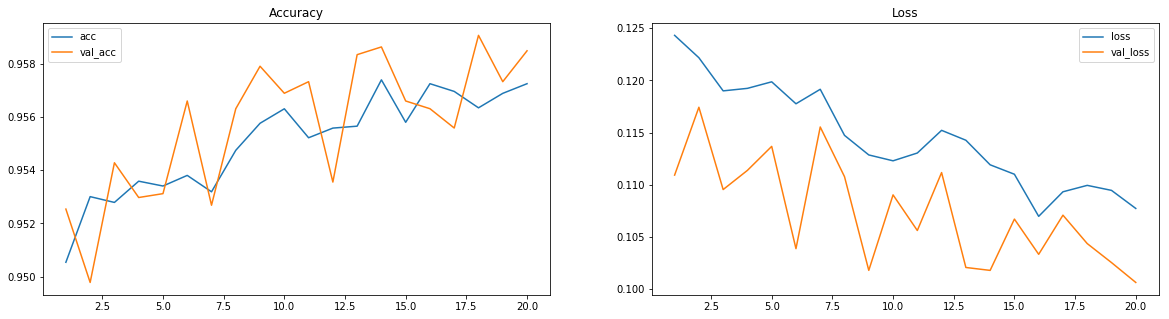

In [29]:
r = range(1, len(history_interpol.history["acc"]) + 1)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(r, history_interpol.history["acc"], label="acc")
plt.plot(r, history_interpol.history["val_acc"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(r, history_interpol.history["loss"], label="loss")
plt.plot(r, history_interpol.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()
plt.close()

In [30]:
eval_results = np.round(model.evaluate(X_test, y_test_encoded, batch_size=32, verbose=1),2)
print("Loss:     " + str(eval_results[0]))
print("Accuracy: " + str(eval_results[1]))

8613/8613 [==============================] - 2s 237us/step
Loss:     0.11
Accuracy: 0.95


## ROC analysis

In [32]:
counter_F_neg=0
counter_F_pos=0
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]!=np.nonzero(y_test_encoded[i])[0][0]):
        if model.predict_classes(X_test[i:(i+1),:,:])[0]==0:
            counter_F_neg=counter_F_neg+1
            print("False_negative i:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test_encoded[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2),)          
        else:
            counter_F_pos=counter_F_pos+1
            print("False_positive i:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test_encoded[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))
print("\ncounter_F_neg:",counter_F_neg) 
print("\ncounter_F_pos:",counter_F_pos) 

False_positive i: 15 	Pred: 1 	Actual: 0 	Probability: 0.82
False_positive i: 17 	Pred: 2 	Actual: 0 	Probability: 0.74
False_positive i: 65 	Pred: 6 	Actual: 0 	Probability: 0.52
False_positive i: 82 	Pred: 1 	Actual: 0 	Probability: 0.51
False_positive i: 107 	Pred: 5 	Actual: 0 	Probability: 0.8
False_positive i: 112 	Pred: 3 	Actual: 0 	Probability: 0.57
False_positive i: 123 	Pred: 3 	Actual: 0 	Probability: 0.6
False_negative i: 183 	Pred: 0 	Actual: 5 	Probability: 0.66
False_negative i: 187 	Pred: 0 	Actual: 2 	Probability: 0.74
False_negative i: 202 	Pred: 0 	Actual: 5 	Probability: 0.9
False_positive i: 219 	Pred: 6 	Actual: 0 	Probability: 0.91
False_positive i: 238 	Pred: 3 	Actual: 0 	Probability: 0.57
False_positive i: 271 	Pred: 2 	Actual: 0 	Probability: 0.54
False_negative i: 276 	Pred: 0 	Actual: 2 	Probability: 0.56
False_negative i: 284 	Pred: 0 	Actual: 3 	Probability: 0.76
False_negative i: 302 	Pred: 0 	Actual: 2 	Probability: 0.73
False_negative i: 307 	Pred: 0 

False_negative i: 2806 	Pred: 0 	Actual: 4 	Probability: 0.64
False_negative i: 2939 	Pred: 0 	Actual: 4 	Probability: 0.58
False_negative i: 2958 	Pred: 0 	Actual: 5 	Probability: 0.93
False_positive i: 2982 	Pred: 6 	Actual: 0 	Probability: 0.86
False_positive i: 2995 	Pred: 6 	Actual: 0 	Probability: 0.87
False_positive i: 2998 	Pred: 5 	Actual: 0 	Probability: 0.85
False_positive i: 3004 	Pred: 1 	Actual: 0 	Probability: 0.77
False_positive i: 3017 	Pred: 6 	Actual: 0 	Probability: 0.92
False_positive i: 3018 	Pred: 6 	Actual: 0 	Probability: 0.64
False_positive i: 3029 	Pred: 1 	Actual: 0 	Probability: 0.82
False_positive i: 3038 	Pred: 1 	Actual: 0 	Probability: 0.61
False_negative i: 3067 	Pred: 0 	Actual: 2 	Probability: 0.64
False_negative i: 3085 	Pred: 0 	Actual: 3 	Probability: 0.5
False_positive i: 3117 	Pred: 3 	Actual: 0 	Probability: 0.59
False_positive i: 3121 	Pred: 6 	Actual: 0 	Probability: 0.91
False_positive i: 3156 	Pred: 6 	Actual: 0 	Probability: 0.61
False_neg

False_positive i: 6033 	Pred: 3 	Actual: 0 	Probability: 0.82
False_positive i: 6054 	Pred: 4 	Actual: 0 	Probability: 0.93
False_positive i: 6097 	Pred: 1 	Actual: 0 	Probability: 0.96
False_positive i: 6099 	Pred: 3 	Actual: 0 	Probability: 0.7
False_negative i: 6148 	Pred: 0 	Actual: 6 	Probability: 0.62
False_positive i: 6256 	Pred: 3 	Actual: 0 	Probability: 0.79
False_negative i: 6273 	Pred: 0 	Actual: 5 	Probability: 0.95
False_negative i: 6274 	Pred: 0 	Actual: 2 	Probability: 0.74
False_positive i: 6287 	Pred: 6 	Actual: 0 	Probability: 0.76
False_negative i: 6299 	Pred: 0 	Actual: 3 	Probability: 0.61
False_positive i: 6312 	Pred: 6 	Actual: 0 	Probability: 0.66
False_negative i: 6366 	Pred: 0 	Actual: 5 	Probability: 0.84
False_negative i: 6372 	Pred: 0 	Actual: 5 	Probability: 0.87
False_positive i: 6382 	Pred: 6 	Actual: 0 	Probability: 0.89
False_positive i: 6387 	Pred: 1 	Actual: 0 	Probability: 0.74
False_positive i: 6411 	Pred: 4 	Actual: 0 	Probability: 0.84
False_pos

In [37]:
for i in range(X_test.shape[0]):
    if (model.predict_classes(X_test[i:(i+1),:,:])[0]==np.nonzero(y_test_encoded[i])[0][0]):
        print("Index:",i,\
              "\tPred:",model.predict_classes(X_test[i:(i+1),:,:])[0],\
              "\tActual:",np.nonzero(y_test_encoded[i])[0][0],\
              "\tProbability:",round(np.max(model.predict_proba(X_test[i:(i+1),:,:])),2))

Index: 0 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8 	Pred: 1 	Actual: 1 	Probability: 0.87
Index: 9 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 10 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 11 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 12 	Pred: 1 	Actual: 1 	Probability: 0.84
Index: 13 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 14 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 16 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 18 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 19 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 20 	Pred: 4 	Actual: 4 	Probability: 0.62
Index: 21 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 22 	Pred: 0 	Actual: 0 	Probability: 0

Index: 179 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 180 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 181 	Pred: 4 	Actual: 4 	Probability: 0.98
Index: 182 	Pred: 5 	Actual: 5 	Probability: 0.93
Index: 184 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 185 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 186 	Pred: 2 	Actual: 2 	Probability: 0.81
Index: 188 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 189 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 190 	Pred: 3 	Actual: 3 	Probability: 0.93
Index: 191 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 192 	Pred: 0 	Actual: 0 	Probability: 0.87
Index: 193 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 194 	Pred: 5 	Actual: 5 	Probability: 0.73
Index: 195 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 196 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 197 	Pred: 0 	Actual: 0 	Probability: 0.64
Index: 198 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 199 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 200 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 201 	

Index: 368 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 370 	Pred: 4 	Actual: 4 	Probability: 0.69
Index: 371 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 372 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 373 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 374 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 375 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 376 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 377 	Pred: 3 	Actual: 3 	Probability: 0.91
Index: 378 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 379 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 380 	Pred: 0 	Actual: 0 	Probability: 0.9
Index: 381 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 382 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 383 	Pred: 3 	Actual: 3 	Probability: 0.7
Index: 384 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 386 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 387 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 388 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 389 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 390 	Pred

Index: 541 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 542 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 543 	Pred: 4 	Actual: 4 	Probability: 0.98
Index: 544 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 545 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 546 	Pred: 6 	Actual: 6 	Probability: 0.91
Index: 547 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 549 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 550 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 551 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 552 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 553 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 554 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 555 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 556 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 557 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 558 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 559 	Pred: 3 	Actual: 3 	Probability: 0.9
Index: 560 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 561 	Pred: 3 	Actual: 3 	Probability: 0.83
Index: 562 	Pre

Index: 725 	Pred: 2 	Actual: 2 	Probability: 0.94
Index: 726 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 727 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 728 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 729 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 730 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 731 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 732 	Pred: 4 	Actual: 4 	Probability: 0.87
Index: 733 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 734 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 735 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 736 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 737 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 738 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 739 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 740 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 741 	Pred: 2 	Actual: 2 	Probability: 0.93
Index: 742 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 743 	Pred: 1 	Actual: 1 	Probability: 0.98
Index: 744 	Pred: 5 	Actual: 5 	Probability: 0.94
Index: 745 	Pr

Index: 913 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 914 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 915 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 916 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 917 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 918 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 919 	Pred: 1 	Actual: 1 	Probability: 0.8
Index: 920 	Pred: 3 	Actual: 3 	Probability: 0.93
Index: 921 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 922 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 923 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 924 	Pred: 4 	Actual: 4 	Probability: 0.88
Index: 925 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 926 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 927 	Pred: 0 	Actual: 0 	Probability: 0.92
Index: 928 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 929 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 930 	Pred: 5 	Actual: 5 	Probability: 0.96
Index: 931 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 932 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 933 	P

Index: 1100 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1101 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1102 	Pred: 4 	Actual: 4 	Probability: 0.98
Index: 1103 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1104 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1105 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1106 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1107 	Pred: 1 	Actual: 1 	Probability: 0.75
Index: 1108 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1109 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1110 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1111 	Pred: 4 	Actual: 4 	Probability: 0.98
Index: 1112 	Pred: 0 	Actual: 0 	Probability: 0.93
Index: 1113 	Pred: 1 	Actual: 1 	Probability: 0.52
Index: 1114 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1115 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1116 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 1117 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1118 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 1119 	Pred: 0 	Actual: 0 	Probabilit

Index: 1279 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 1280 	Pred: 3 	Actual: 3 	Probability: 0.95
Index: 1281 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1282 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1283 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1284 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1285 	Pred: 6 	Actual: 6 	Probability: 0.89
Index: 1286 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1287 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1288 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1289 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 1290 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1291 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1292 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1293 	Pred: 3 	Actual: 3 	Probability: 0.56
Index: 1294 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1295 	Pred: 5 	Actual: 5 	Probability: 0.91
Index: 1296 	Pred: 6 	Actual: 6 	Probability: 0.93
Index: 1297 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1298 	Pred: 0 	Actual: 0 	Probabilit

Index: 1456 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1457 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1458 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1459 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1460 	Pred: 0 	Actual: 0 	Probability: 0.69
Index: 1461 	Pred: 0 	Actual: 0 	Probability: 0.93
Index: 1462 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1463 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1464 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1465 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 1466 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 1467 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1468 	Pred: 0 	Actual: 0 	Probability: 0.78
Index: 1469 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1470 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1471 	Pred: 0 	Actual: 0 	Probability: 0.94
Index: 1472 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1473 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1474 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1475 	Pred: 0 	Actual: 0 	Probability

Index: 1630 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1632 	Pred: 0 	Actual: 0 	Probability: 0.58
Index: 1633 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1634 	Pred: 0 	Actual: 0 	Probability: 0.94
Index: 1635 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1636 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1637 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1638 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1639 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1641 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1642 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1643 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1644 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1645 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1646 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 1647 	Pred: 0 	Actual: 0 	Probability: 0.5
Index: 1648 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 1649 	Pred: 0 	Actual: 0 	Probability: 0.91
Index: 1650 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 1651 	Pred: 0 	Actual: 0 	Probability

Index: 1817 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1818 	Pred: 2 	Actual: 2 	Probability: 0.87
Index: 1819 	Pred: 0 	Actual: 0 	Probability: 0.87
Index: 1820 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 1821 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1822 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1823 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1825 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 1826 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1827 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1828 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 1829 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1830 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1831 	Pred: 3 	Actual: 3 	Probability: 0.81
Index: 1832 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1833 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 1834 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1835 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 1836 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 1837 	Pred: 0 	Actual: 0 	Probabili

Index: 1999 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2000 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 2001 	Pred: 0 	Actual: 0 	Probability: 0.53
Index: 2002 	Pred: 4 	Actual: 4 	Probability: 0.94
Index: 2003 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2004 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2005 	Pred: 1 	Actual: 1 	Probability: 0.9
Index: 2006 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2007 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2008 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2009 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2010 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 2011 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2012 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2013 	Pred: 2 	Actual: 2 	Probability: 0.7
Index: 2014 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2015 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2016 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2017 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 2018 	Pred: 2 	Actual: 2 	Probability:

Index: 2171 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2172 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2173 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 2174 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2176 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2177 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2178 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2179 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2180 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2181 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 2182 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2183 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2184 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2185 	Pred: 0 	Actual: 0 	Probability: 0.71
Index: 2186 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 2187 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2189 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2190 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 2191 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2192 	Pred: 0 	Actual: 0 	Probability:

Index: 2349 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2350 	Pred: 4 	Actual: 4 	Probability: 0.99
Index: 2352 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2353 	Pred: 5 	Actual: 5 	Probability: 0.85
Index: 2354 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2355 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2356 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2357 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 2358 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2359 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2360 	Pred: 6 	Actual: 6 	Probability: 0.89
Index: 2361 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2362 	Pred: 1 	Actual: 1 	Probability: 0.77
Index: 2363 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 2364 	Pred: 1 	Actual: 1 	Probability: 0.96
Index: 2365 	Pred: 0 	Actual: 0 	Probability: 0.86
Index: 2366 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2367 	Pred: 4 	Actual: 4 	Probability: 0.9
Index: 2368 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2369 	Pred: 0 	Actual: 0 	Probabili

Index: 2524 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2525 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2526 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 2527 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2528 	Pred: 2 	Actual: 2 	Probability: 0.97
Index: 2530 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2531 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2532 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2533 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2534 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2535 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2536 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2537 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2538 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 2539 	Pred: 0 	Actual: 0 	Probability: 0.73
Index: 2540 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2541 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 2542 	Pred: 0 	Actual: 0 	Probability: 0.93
Index: 2543 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2545 	Pred: 0 	Actual: 0 	Probability

Index: 2701 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2702 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2703 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2704 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2705 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2706 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 2707 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2708 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2709 	Pred: 2 	Actual: 2 	Probability: 0.97
Index: 2710 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2711 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2712 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2713 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2714 	Pred: 0 	Actual: 0 	Probability: 0.59
Index: 2715 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2716 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2717 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 2718 	Pred: 5 	Actual: 5 	Probability: 0.85
Index: 2719 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2720 	Pred: 0 	Actual: 0 	Probability:

Index: 2879 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 2880 	Pred: 3 	Actual: 3 	Probability: 0.89
Index: 2881 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2882 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2883 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 2884 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2885 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2886 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2887 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2888 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2889 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2890 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2891 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2892 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2893 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2894 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2895 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2896 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 2897 	Pred: 4 	Actual: 4 	Probability: 0.92
Index: 2898 	Pred: 0 	Actual: 0 	Probability: 

Index: 3061 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3062 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 3063 	Pred: 0 	Actual: 0 	Probability: 0.9
Index: 3064 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3065 	Pred: 3 	Actual: 3 	Probability: 0.93
Index: 3066 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3068 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3069 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 3070 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3071 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3072 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3073 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3074 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3075 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3076 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 3077 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3078 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3079 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 3080 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3081 	Pred: 0 	Actual: 0 	Probability: 

Index: 3234 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3235 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3236 	Pred: 0 	Actual: 0 	Probability: 0.93
Index: 3237 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3238 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3239 	Pred: 0 	Actual: 0 	Probability: 0.86
Index: 3240 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 3241 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 3242 	Pred: 6 	Actual: 6 	Probability: 0.91
Index: 3243 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3244 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3245 	Pred: 0 	Actual: 0 	Probability: 0.91
Index: 3246 	Pred: 6 	Actual: 6 	Probability: 0.93
Index: 3247 	Pred: 2 	Actual: 2 	Probability: 0.68
Index: 3248 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3249 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3250 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3251 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3252 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3253 	Pred: 0 	Actual: 0 	Probabili

Index: 3408 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3409 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3410 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3411 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3412 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 3413 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 3414 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 3415 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3416 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3418 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3419 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3420 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3421 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3422 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3423 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3425 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3426 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3427 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 3428 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3429 	Pred: 0 	Actual: 0 	Probability: 

Index: 3581 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3582 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3583 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3585 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3586 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3587 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3588 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3589 	Pred: 1 	Actual: 1 	Probability: 0.97
Index: 3590 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3591 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 3592 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3593 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3595 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3596 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3597 	Pred: 3 	Actual: 3 	Probability: 0.66
Index: 3598 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3599 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3600 	Pred: 5 	Actual: 5 	Probability: 0.92
Index: 3602 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3603 	Pred: 4 	Actual: 4 	Probability: 

Index: 3763 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3764 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3765 	Pred: 6 	Actual: 6 	Probability: 0.91
Index: 3766 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3767 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3768 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3769 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3770 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3771 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3772 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3773 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3774 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3775 	Pred: 5 	Actual: 5 	Probability: 0.83
Index: 3776 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3777 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3778 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3779 	Pred: 0 	Actual: 0 	Probability: 0.94
Index: 3780 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3781 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3782 	Pred: 0 	Actual: 0 	Probability: 0

Index: 3935 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3936 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3937 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3938 	Pred: 6 	Actual: 6 	Probability: 0.9
Index: 3939 	Pred: 5 	Actual: 5 	Probability: 0.66
Index: 3940 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3941 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3942 	Pred: 0 	Actual: 0 	Probability: 0.86
Index: 3943 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3944 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3945 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3946 	Pred: 0 	Actual: 0 	Probability: 0.82
Index: 3947 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3948 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3950 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3951 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3952 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3954 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3955 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 3956 	Pred: 0 	Actual: 0 	Probability: 1

Index: 4115 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4116 	Pred: 1 	Actual: 1 	Probability: 0.68
Index: 4117 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 4118 	Pred: 0 	Actual: 0 	Probability: 0.93
Index: 4120 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4121 	Pred: 2 	Actual: 2 	Probability: 0.91
Index: 4122 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 4123 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4124 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4125 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4126 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4127 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4128 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4129 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 4130 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4131 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4132 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4133 	Pred: 0 	Actual: 0 	Probability: 0.73
Index: 4134 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4135 	Pred: 0 	Actual: 0 	Probabilit

Index: 4289 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 4290 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4291 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4292 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4293 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4295 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4296 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4297 	Pred: 0 	Actual: 0 	Probability: 0.87
Index: 4298 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4299 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4300 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4301 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4302 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4303 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4304 	Pred: 3 	Actual: 3 	Probability: 0.97
Index: 4305 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4306 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4307 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4308 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4309 	Pred: 0 	Actual: 0 	Probability: 1

Index: 4463 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4464 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4465 	Pred: 0 	Actual: 0 	Probability: 0.94
Index: 4466 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4468 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4469 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4471 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4472 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 4473 	Pred: 3 	Actual: 3 	Probability: 0.96
Index: 4474 	Pred: 0 	Actual: 0 	Probability: 0.83
Index: 4475 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4476 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4478 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 4479 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4480 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4481 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4482 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4483 	Pred: 4 	Actual: 4 	Probability: 0.96
Index: 4484 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4485 	Pred: 0 	Actual: 0 	Probability:

Index: 4645 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4646 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4647 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4648 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4649 	Pred: 0 	Actual: 0 	Probability: 0.51
Index: 4650 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4651 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4652 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4653 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4654 	Pred: 5 	Actual: 5 	Probability: 0.73
Index: 4655 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4656 	Pred: 0 	Actual: 0 	Probability: 0.94
Index: 4657 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4658 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 4659 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4660 	Pred: 0 	Actual: 0 	Probability: 0.58
Index: 4661 	Pred: 3 	Actual: 3 	Probability: 0.87
Index: 4662 	Pred: 4 	Actual: 4 	Probability: 0.98
Index: 4663 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4664 	Pred: 0 	Actual: 0 	Probabilit

Index: 4814 	Pred: 6 	Actual: 6 	Probability: 0.74
Index: 4815 	Pred: 3 	Actual: 3 	Probability: 0.97
Index: 4816 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4817 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4818 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4819 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4820 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4821 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4822 	Pred: 4 	Actual: 4 	Probability: 0.94
Index: 4823 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4824 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4825 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4826 	Pred: 2 	Actual: 2 	Probability: 0.95
Index: 4827 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4828 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 4829 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4830 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4831 	Pred: 3 	Actual: 3 	Probability: 0.69
Index: 4832 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4833 	Pred: 0 	Actual: 0 	Probability

Index: 4985 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4986 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4987 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4988 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4989 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4990 	Pred: 5 	Actual: 5 	Probability: 0.79
Index: 4991 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4992 	Pred: 5 	Actual: 5 	Probability: 0.97
Index: 4993 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 4994 	Pred: 0 	Actual: 0 	Probability: 0.92
Index: 4995 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 4996 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4997 	Pred: 0 	Actual: 0 	Probability: 0.68
Index: 4998 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 4999 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5000 	Pred: 0 	Actual: 0 	Probability: 0.8
Index: 5001 	Pred: 0 	Actual: 0 	Probability: 0.9
Index: 5002 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5003 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 5004 	Pred: 0 	Actual: 0 	Probabilit

Index: 5161 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5162 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5163 	Pred: 3 	Actual: 3 	Probability: 0.72
Index: 5164 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 5166 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5167 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5168 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5169 	Pred: 2 	Actual: 2 	Probability: 0.83
Index: 5170 	Pred: 2 	Actual: 2 	Probability: 0.54
Index: 5171 	Pred: 4 	Actual: 4 	Probability: 0.78
Index: 5172 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5173 	Pred: 0 	Actual: 0 	Probability: 0.93
Index: 5174 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5175 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5176 	Pred: 0 	Actual: 0 	Probability: 0.91
Index: 5177 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5178 	Pred: 0 	Actual: 0 	Probability: 0.82
Index: 5179 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5180 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5181 	Pred: 1 	Actual: 1 	Probabili

Index: 5330 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5331 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5332 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5333 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5334 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 5336 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5338 	Pred: 0 	Actual: 0 	Probability: 0.91
Index: 5339 	Pred: 0 	Actual: 0 	Probability: 0.91
Index: 5340 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5341 	Pred: 5 	Actual: 5 	Probability: 0.97
Index: 5342 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5343 	Pred: 0 	Actual: 0 	Probability: 0.91
Index: 5344 	Pred: 4 	Actual: 4 	Probability: 0.98
Index: 5345 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5346 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5347 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5348 	Pred: 0 	Actual: 0 	Probability: 0.78
Index: 5349 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5350 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5351 	Pred: 5 	Actual: 5 	Probabilit

Index: 5504 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5505 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5506 	Pred: 0 	Actual: 0 	Probability: 0.53
Index: 5507 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5508 	Pred: 5 	Actual: 5 	Probability: 0.8
Index: 5509 	Pred: 0 	Actual: 0 	Probability: 0.67
Index: 5510 	Pred: 2 	Actual: 2 	Probability: 0.91
Index: 5511 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5512 	Pred: 0 	Actual: 0 	Probability: 0.59
Index: 5513 	Pred: 0 	Actual: 0 	Probability: 0.94
Index: 5514 	Pred: 6 	Actual: 6 	Probability: 0.83
Index: 5515 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5516 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5517 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5518 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 5519 	Pred: 1 	Actual: 1 	Probability: 0.94
Index: 5520 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5521 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5522 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5523 	Pred: 6 	Actual: 6 	Probabili

Index: 5677 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5678 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5679 	Pred: 1 	Actual: 1 	Probability: 0.67
Index: 5680 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5681 	Pred: 0 	Actual: 0 	Probability: 0.79
Index: 5682 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5683 	Pred: 2 	Actual: 2 	Probability: 0.97
Index: 5684 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 5685 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5686 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5687 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 5688 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5689 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5690 	Pred: 3 	Actual: 3 	Probability: 1.0
Index: 5691 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5692 	Pred: 3 	Actual: 3 	Probability: 0.97
Index: 5693 	Pred: 1 	Actual: 1 	Probability: 0.99
Index: 5694 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5695 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5696 	Pred: 0 	Actual: 0 	Probabilit

Index: 5848 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5849 	Pred: 0 	Actual: 0 	Probability: 0.95
Index: 5850 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5851 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5852 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5853 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5854 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5855 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5856 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 5857 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 5858 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5859 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5860 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5861 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5862 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5863 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5864 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5865 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 5866 	Pred: 0 	Actual: 0 	Probability: 0.88
Index: 5867 	Pred: 0 	Actual: 0 	Probability: 

Index: 6024 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 6025 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6026 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6028 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6029 	Pred: 0 	Actual: 0 	Probability: 0.67
Index: 6030 	Pred: 4 	Actual: 4 	Probability: 0.95
Index: 6031 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6032 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6034 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6035 	Pred: 2 	Actual: 2 	Probability: 0.9
Index: 6036 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6037 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6038 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6039 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6040 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6041 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6042 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6043 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6044 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6045 	Pred: 0 	Actual: 0 	Probability: 0

Index: 6198 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6199 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6200 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6201 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 6202 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6203 	Pred: 0 	Actual: 0 	Probability: 0.94
Index: 6204 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6205 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6206 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6207 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6208 	Pred: 3 	Actual: 3 	Probability: 0.92
Index: 6209 	Pred: 6 	Actual: 6 	Probability: 0.88
Index: 6210 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6211 	Pred: 0 	Actual: 0 	Probability: 0.77
Index: 6212 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6213 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6214 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6215 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 6216 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6217 	Pred: 0 	Actual: 0 	Probability

Index: 6375 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6376 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6377 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6378 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6379 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6380 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6381 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 6383 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6384 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6385 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6386 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 6388 	Pred: 6 	Actual: 6 	Probability: 0.9
Index: 6389 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6390 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 6391 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6392 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6393 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6394 	Pred: 5 	Actual: 5 	Probability: 0.62
Index: 6395 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6396 	Pred: 0 	Actual: 0 	Probability: 

Index: 6555 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6556 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 6557 	Pred: 0 	Actual: 0 	Probability: 0.7
Index: 6558 	Pred: 0 	Actual: 0 	Probability: 0.86
Index: 6559 	Pred: 3 	Actual: 3 	Probability: 0.94
Index: 6560 	Pred: 0 	Actual: 0 	Probability: 0.56
Index: 6561 	Pred: 2 	Actual: 2 	Probability: 0.9
Index: 6562 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6563 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6564 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6565 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6566 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6567 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6568 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6569 	Pred: 3 	Actual: 3 	Probability: 0.57
Index: 6570 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6571 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6572 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6573 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6574 	Pred: 0 	Actual: 0 	Probability:

Index: 6730 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6731 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6732 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6733 	Pred: 3 	Actual: 3 	Probability: 0.96
Index: 6734 	Pred: 0 	Actual: 0 	Probability: 0.92
Index: 6735 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6737 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6738 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6739 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6740 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6741 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6742 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6743 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6744 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6745 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6746 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6747 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6748 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6749 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6750 	Pred: 0 	Actual: 0 	Probability: 1.

Index: 6909 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6910 	Pred: 0 	Actual: 0 	Probability: 0.93
Index: 6911 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6912 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6913 	Pred: 3 	Actual: 3 	Probability: 0.96
Index: 6914 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6915 	Pred: 6 	Actual: 6 	Probability: 0.93
Index: 6916 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6917 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6918 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6919 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6920 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6921 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6922 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6923 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6924 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6925 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6926 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 6927 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 6928 	Pred: 2 	Actual: 2 	Probability: 

Index: 7086 	Pred: 1 	Actual: 1 	Probability: 0.97
Index: 7087 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7088 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7089 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7090 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7091 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 7092 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7093 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7094 	Pred: 5 	Actual: 5 	Probability: 0.76
Index: 7095 	Pred: 0 	Actual: 0 	Probability: 0.89
Index: 7096 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 7097 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7098 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7099 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 7100 	Pred: 0 	Actual: 0 	Probability: 0.97
Index: 7101 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7102 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7104 	Pred: 0 	Actual: 0 	Probability: 0.96
Index: 7105 	Pred: 2 	Actual: 2 	Probability: 0.89
Index: 7106 	Pred: 0 	Actual: 0 	Probabil

Index: 7264 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 7265 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7266 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7267 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7269 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7271 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7272 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7273 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7274 	Pred: 4 	Actual: 4 	Probability: 0.91
Index: 7275 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7276 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7277 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7278 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7279 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7280 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7281 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7282 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7283 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7285 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7286 	Pred: 0 	Actual: 0 	Probability: 1.

Index: 7444 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7445 	Pred: 1 	Actual: 1 	Probability: 0.78
Index: 7446 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7447 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7448 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7449 	Pred: 1 	Actual: 1 	Probability: 0.95
Index: 7450 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7451 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7452 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7453 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7454 	Pred: 0 	Actual: 0 	Probability: 0.82
Index: 7455 	Pred: 1 	Actual: 1 	Probability: 0.97
Index: 7456 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7457 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7458 	Pred: 6 	Actual: 6 	Probability: 0.9
Index: 7459 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7460 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7461 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 7462 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7463 	Pred: 0 	Actual: 0 	Probability:

Index: 7628 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7629 	Pred: 4 	Actual: 4 	Probability: 0.92
Index: 7630 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7631 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7632 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7633 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7634 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7635 	Pred: 0 	Actual: 0 	Probability: 0.8
Index: 7636 	Pred: 6 	Actual: 6 	Probability: 0.91
Index: 7638 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7639 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7640 	Pred: 3 	Actual: 3 	Probability: 0.75
Index: 7641 	Pred: 3 	Actual: 3 	Probability: 0.98
Index: 7642 	Pred: 3 	Actual: 3 	Probability: 0.99
Index: 7643 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 7644 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7645 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7647 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7648 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7649 	Pred: 0 	Actual: 0 	Probability

Index: 7809 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7810 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7811 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 7812 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7813 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7814 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7815 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 7816 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7817 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7818 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7819 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7820 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 7821 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7822 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7823 	Pred: 6 	Actual: 6 	Probability: 0.65
Index: 7824 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7825 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7826 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7827 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7828 	Pred: 0 	Actual: 0 	Probability: 

Index: 7991 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7992 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7993 	Pred: 6 	Actual: 6 	Probability: 0.92
Index: 7994 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7995 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7996 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7997 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7998 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 7999 	Pred: 3 	Actual: 3 	Probability: 0.93
Index: 8000 	Pred: 5 	Actual: 5 	Probability: 0.79
Index: 8001 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8002 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8003 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8004 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8005 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8006 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8007 	Pred: 0 	Actual: 0 	Probability: 0.63
Index: 8008 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8009 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8010 	Pred: 0 	Actual: 0 	Probability: 

Index: 8164 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8165 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 8167 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8168 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8169 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8170 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 8171 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8172 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8174 	Pred: 0 	Actual: 0 	Probability: 0.88
Index: 8175 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8176 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8177 	Pred: 0 	Actual: 0 	Probability: 0.99
Index: 8178 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8180 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8181 	Pred: 6 	Actual: 6 	Probability: 0.84
Index: 8182 	Pred: 3 	Actual: 3 	Probability: 0.96
Index: 8183 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 8184 	Pred: 0 	Actual: 0 	Probability: 0.54
Index: 8185 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8186 	Pred: 0 	Actual: 0 	Probabili

Index: 8342 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8343 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8344 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8345 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8346 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8347 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8348 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8349 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8350 	Pred: 4 	Actual: 4 	Probability: 0.86
Index: 8351 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8352 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8353 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8354 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8355 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8356 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8357 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8358 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8359 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 8361 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8362 	Pred: 0 	Actual: 0 	Probability: 1.

Index: 8519 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8520 	Pred: 0 	Actual: 0 	Probability: 0.98
Index: 8521 	Pred: 0 	Actual: 0 	Probability: 0.87
Index: 8522 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8524 	Pred: 3 	Actual: 3 	Probability: 0.88
Index: 8525 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8526 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8527 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8528 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8529 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8530 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8531 	Pred: 0 	Actual: 0 	Probability: 0.57
Index: 8532 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8533 	Pred: 0 	Actual: 0 	Probability: 0.8
Index: 8534 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8535 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8536 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8537 	Pred: 0 	Actual: 0 	Probability: 0.88
Index: 8538 	Pred: 0 	Actual: 0 	Probability: 1.0
Index: 8539 	Pred: 0 	Actual: 0 	Probability:

In [34]:
y = y_test_encoded.copy()
n = y.shape[0]

label = np.zeros(n)
pred = np.zeros(n)

for i in range(n):
    label[i] = np.argmax(y[i,:])
    pred[i] = model.predict_classes(X_test[i:(i+1),:,:])
    if i % 100 == 0:
        print(i)
    
label   
pred

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600


array([0., 0., 0., ..., 0., 0., 3.])

In [35]:
for i in range(7):
    print(i,len(label[label==i]),len(pred[pred==i]))

0 7141 7059
1 263 272
2 203 209
3 322 355
4 199 205
5 212 202
6 273 311


In [ ]:
100*7412/8810

### 2.4 Save model

In [38]:
from keras.models import load_model
import h5py
# save model, delete current reference and re-load it from file
model.save('models/model_gesture_lstm_ip50_tr2_sazero1000.h5')

In [ ]:

#del model
#model = load_model('005_model_gesture.h5')

In [ ]:
type(model)